# Group 2 Final Project Technical Notebook

Name(s): Dominic Fanucchi, Carlo Sanchez, Hani Jandali    
Date:    November 5, 2023

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns


# Style sheet to use with Matplotlib and Seaborn plots
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [3]:
import os
import keras
import tensorflow as tf
from keras.preprocessing.image import load_img

dir_ = r'../aai-501_group2/notMNIST_small'
# small_dataset = 'notMNIST_small'
# large_dataset = 'notMNIST_large'

dirs = os.listdir(dir_)

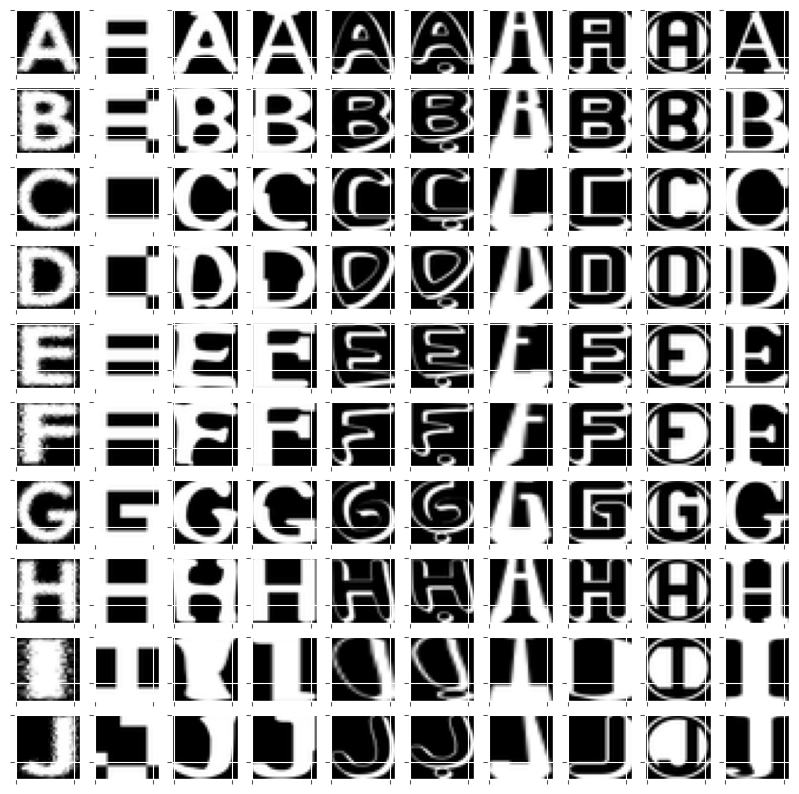

In [4]:
max_images = 100
grid_width = 10
grid_height = int(max_images/grid_width)
fig, axs = plt.subplots(grid_height, grid_width, figsize=(grid_width, grid_height))

for j, cls in enumerate(dirs):
    figs = os.listdir(dir_ + '/' + cls)
    for i, fig in enumerate(figs[:grid_width]):
        ax = axs[j,i]
        ax.imshow(np.array(load_img(dir_ + '/' + cls + '/' + fig)))
        ax.set_yticklabels([])
        ax.set_xticklabels([])

# Analysis: Multinominal Logistical Regression  
### Carlo Sanchez

In [10]:
# import os # duplicate import statement
from PIL import Image
# import numpy as np # duplicate import statement
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [6]:
#use function to load images and image lables 
def load_data(data_path):
    #set empty lists for images and labels
    images = []
    labels = []

    for label in os.listdir(data_path):
        label_path = os.path.join(data_path, label)
        if os.path.isdir(label_path):
            for image_file in os.listdir(label_path):
                image_path = os.path.join(label_path, image_file)
                """
                had to use try and except, would crash and stop compiling lists when hit an
                image that it could not read
        
                """
                try:
                    #load and image and convert to gray scale
                    img = Image.open(image_path).convert('L')
                    #ensure correct image size --> for consistancy
                    img = img.resize((28, 28))
                    #converts image to array
                    
                    img_array = np.array(img)
                    #flatten images from array
                    img_flat = img_array.flatten()
                    
                    images.append(img_flat)
                    labels.append(np.array(label))
                    
                except Exception as e:
                    print(f"error loading image {image_path}: {e}")
                    continue  #skip to next image
    #returns the images and labels as an array
    print("Complete")
    return np.array(images), np.array(labels)

images, labels = load_data(dir_)

Complete


In [7]:
print(images.shape)
print(labels.shape, labels.dtype)

(18724, 784)
(18724,) <U1


In [15]:
#split data for training and testing at random state=0
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=0)

#scale a fit data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#train model 
model = LogisticRegression(max_iter=100000,multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

#use model to make predictions
y_pred = model.predict(X_test)

#model accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:\n", metrics.classification_report(y_test, y_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.861415220293725
Classification Report:
               precision    recall  f1-score   support

           A       0.87      0.89      0.88       361
           B       0.85      0.84      0.84       367
           C       0.89      0.90      0.89       371
           D       0.89      0.87      0.88       388
           E       0.85      0.82      0.83       365
           F       0.85      0.88      0.86       390
           G       0.87      0.85      0.86       374
           H       0.85      0.85      0.85       369
           I       0.84      0.86      0.85       396
           J       0.87      0.86      0.87       364

    accuracy                           0.86      3745
   macro avg       0.86      0.86      0.86      3745
weighted avg       0.86      0.86      0.86      3745

Confusion Matrix:
 [[322   5   0   1   3   4   6  12   4   4]
 [  4 307   1  13   8  10   8   5   7   4]
 [  3   3 333   2  13   2   7   3   3   2]
 [  5  12   3 338   2   6   2   3   7  10

Average Cross-Validation Accuracy: 0.850323837459406


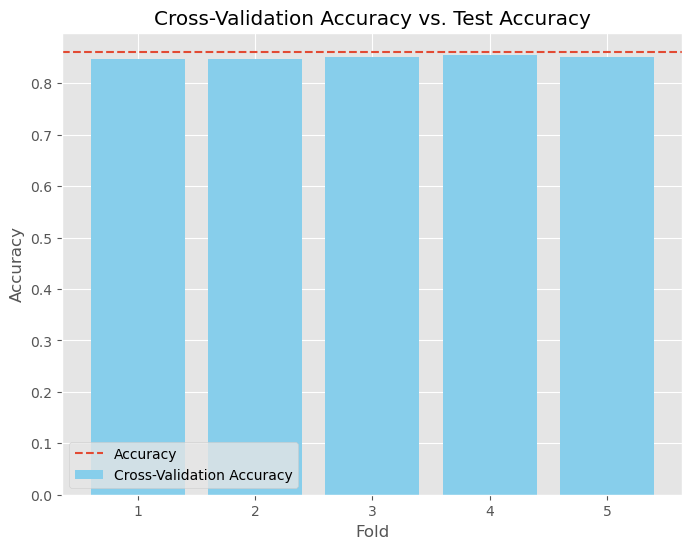

In [14]:
#cross-validation to get accuracy values
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# averageaccuracy from cross-validation
print(f"Average Cross-Validation Accuracy: {np.mean(cv_scores)}")

# plot the accuracy graph
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), cv_scores, color="skyblue", label='Cross-Validation Accuracy')
plt.axhline(y=accuracy, linestyle='--', label='Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy vs. Test Accuracy')
plt.legend()
plt.show()

# CNN  
### Dominic Fanucchi

In [82]:
from tensorflow.keras.utils import to_categorical

# convert letters (A-J) to integers (0-9)
label_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9}
integer_labels = np.array([label_mapping[label] for label in labels])

# one-hot encoding labels for loss function
one_hot_labels = to_categorical(integer_labels, num_classes=10)


# split data for training and testing at random state=0
x_train, x_test, y_train, y_test = train_test_split(images, one_hot_labels, test_size=0.2, random_state=0)

# checking how the data has been split
print(f'Data:   {images.shape} | x_train: {x_train.shape} | x_test: {x_test.shape}')
print(f'Labels: {labels.shape}     | y_train: {y_train.shape}  | y_test: {y_test.shape}')

Data:   (18724, 784) | x_train: (14979, 784) | x_test: (3745, 784)
Labels: (18724,)     | y_train: (14979, 10)  | y_test: (3745, 10)


[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


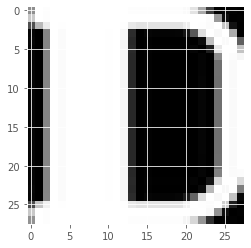

In [83]:
# quick visualization of a single digit

image_index = 140 # any value up to 14979
print(y_train[image_index])
plt.imshow(x_train[image_index].reshape(28,28), cmap='gray')
plt.show()

In [115]:
# reshapeing and normalizing images so our dataset works with the Keras API

# print(x_train.shape[0])
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# print('x_train shape:', x_train.shape)

x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (14979, 28, 28, 1)
Number of images in x_train 14979
Number of images in x_test 3745


In [140]:
# import Keras modules containing model and layers
# from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# create a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(32, kernel_size=(5, 5), activation=tf.nn.relu))
# model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.15))
model.add(Dense(10,activation=tf.nn.softmax))

# model.output_shape
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 13, 13, 28)        0         
 ng2D)                                                           
                                                                 
 flatten_25 (Flatten)        (None, 4732)              0         
                                                                 
 dense_48 (Dense)            (None, 128)               605824    
                                                                 
 dropout_24 (Dropout)        (None, 128)               0         
                                                                 
 dense_49 (Dense)            (None, 10)                1290      
                                                     

In [141]:
from tensorflow.keras.callbacks import History
history_callback = History()

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# train model and pass the history callback to capture the metrics
model.fit(x=x_train, y=y_train, epochs=10, callbacks=[history_callback])

Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 1.1099 - accuracy: 0.6883
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4915 - accuracy: 0.8686
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4163 - accuracy: 0.8838
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3667 - accuracy: 0.8956
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3383 - accuracy: 0.9021
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3123 - accuracy: 0.9093
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2914 - accuracy: 0.9145
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2748 - accuracy: 0.9184
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2643 - accuracy: 0.9206
Epoch 10/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2477 - accuracy: 0.9237

In [142]:
# evaluating the model on the test set
evaluation = model.evaluate(x=x_test, y=y_test)

print(f'Test Loss: {evaluation[0]}')
print(f'Test Accuracy: {evaluation[1]}')

118/118 [==============================] - 0s 2ms/step - loss: 0.2680 - accuracy: 0.9234
Test Loss: 0.26800286769866943
Test Accuracy: 0.9233644604682922


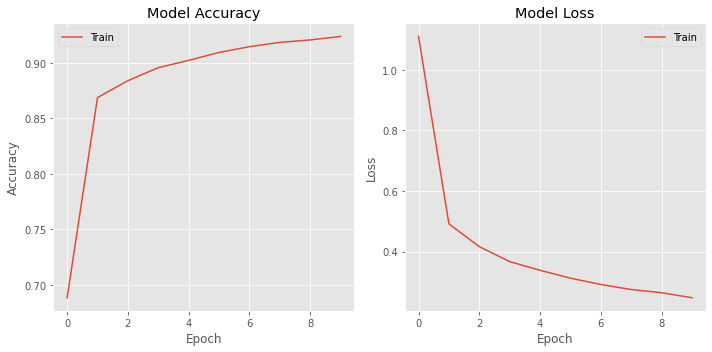

In [143]:
# Access the history of metrics from the callback
history = history_callback.history

# Plot training accuracy and loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.grid(True)

plt.tight_layout()
plt.show()